In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

df=pd.read_csv('/content/resume_shortlisting_10_columns.csv')
df1=pd.DataFrame(df)
df1.head()


,name,education_level,years_experience,skills,certifications,job_role_applied,university_tier,known_languages,location,shortlisted
0,Candidate_1,Bachelor's,7.1,"Flask, NumPy, AWS, Pandas, JavaScript, Java",4,ML Engineer,Tier 2,"Telugu, Hindi",Mumbai,0
1,Candidate_2,Master's,5.1,"NLP, C++, Keras, Matplotlib, Pandas",2,Data Scientist,Tier 3,Hindi,Pune,0
2,Candidate_3,PhD,0.1,"Machine Learning, TensorFlow, React",4,ML Engineer,Tier 1,"Telugu, English",Chennai,1
3,Candidate_4,Master's,4.7,"SQL, C++, React, AWS, TensorFlow, NumPy",3,Backend Developer,Tier 1,"Tamil, Telugu",Hyderabad,0
4,Candidate_5,PhD,7.4,"Flask, Pandas, Java",4,Backend Developer,Tier 1,"Hindi, Tamil, Telugu",Bangalore,1


In [ ]:
df1.isnull().sum()

,0
name,0
education_level,0
years_experience,0
skills,0
certifications,0
job_role_applied,0
university_tier,0
known_languages,0
location,0
shortlisted,0


In [ ]:
df1['location'].unique()


array(['Mumbai', 'Pune', 'Chennai', 'Hyderabad', 'Bangalore', 'Delhi'],
      dtype=object)

In [ ]:
df['job_role_applied'].unique()


array(['ML Engineer', 'Data Scientist', 'Backend Developer',
       'Frontend Developer', 'Data Analyst'], dtype=object)

In [ ]:
df1.drop(['university_tier'], axis=1, inplace=True)

df1.head()

,name,education_level,years_experience,skills,certifications,job_role_applied,known_languages,location,shortlisted
0,Candidate_1,Bachelor's,7.1,"Flask, NumPy, AWS, Pandas, JavaScript, Java",4,ML Engineer,"Telugu, Hindi",Mumbai,0
1,Candidate_2,Master's,5.1,"NLP, C++, Keras, Matplotlib, Pandas",2,Data Scientist,Hindi,Pune,0
2,Candidate_3,PhD,0.1,"Machine Learning, TensorFlow, React",4,ML Engineer,"Telugu, English",Chennai,1
3,Candidate_4,Master's,4.7,"SQL, C++, React, AWS, TensorFlow, NumPy",3,Backend Developer,"Tamil, Telugu",Hyderabad,0
4,Candidate_5,PhD,7.4,"Flask, Pandas, Java",4,Backend Developer,"Hindi, Tamil, Telugu",Bangalore,1


In [111]:
columns_encode = [
               'name',
              'education_level',
              'skills',
               'job_role_applied',
               'known_languages',
               'location']


le = LabelEncoder()
for col in columns_encode:
    df1[col] = le.fit_transform(df[col])


In [ ]:
df1['encoded_name'] = encoded_name
df1['encoded_education'] = encoded_education
df1['encoded_skills'] = encoded_skills
df1['encoded_job_role'] = encoded_job_role
df1['encoded_languages'] = encoded_languages
df1['encoded_location'] = encoded_location


In [ ]:
X=df1[['encoded_name','encoded_education','encoded_skills','encoded_job_role','encoded_languages','encoded_location']]
X.head(20)

,encoded_name,encoded_education,encoded_skills,encoded_job_role,encoded_languages,encoded_location
0,0,0,243,4,73,4
1,112,1,507,2,17,5
2,223,2,469,4,69,1
3,334,1,796,0,64,3
4,445,2,246,0,29,0
5,556,2,519,2,83,5
6,667,0,270,4,51,3
7,778,0,114,4,84,2
8,889,1,90,3,68,1
9,1,0,237,1,33,2


In [ ]:
Y=df1[['shortlisted']]
Y.head(5)

,shortlisted
0,0
1,0
2,1
3,0
4,1


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_test, X_train, Y_test, Y_train = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
# @title DecisionTreeClassifier Model
model1=DecisionTreeClassifier()
model1.fit(X_train,Y_train)


DecisionTreeClassifier()

In [ ]:
y_pred=model1.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,y_pred)
print(accuracy)

0.5706666666666667


In [ ]:
X_test

,encoded_name,encoded_education,encoded_skills,encoded_job_role,encoded_languages,encoded_location
82,812,2,193,0,35,0
991,992,2,618,4,1,3
789,768,2,908,4,77,1
894,884,0,911,0,9,2
398,333,1,266,2,53,2
...,...,...,...,...,...,...
106,10,0,706,4,26,2
270,192,0,945,4,64,4
860,847,2,302,2,25,0
435,375,0,592,1,2,3


In [ ]:
X_train

,encoded_name,encoded_education,encoded_skills,encoded_job_role,encoded_languages,encoded_location
521,471,2,906,0,25,2
737,710,0,873,0,9,5
740,714,1,495,2,69,5
660,625,0,498,3,83,1
411,349,1,283,2,6,0
...,...,...,...,...,...,...
109,14,1,404,0,8,3
430,370,0,529,2,51,3
77,756,0,811,0,56,0
84,834,1,835,4,51,2


In [ ]:
Y_train

,shortlisted
521,0
737,0
740,0
660,0
411,0
...,...
109,1
430,1
77,0
84,0


In [ ]:
Y_test

,shortlisted
82,0
991,1
789,0
894,1
398,0
...,...
106,1
270,1
860,0
435,0


In [ ]:
# @title LINEAR MODEL
model2=LinearRegression()
model2.fit(X,Y)

LinearRegression()

In [ ]:
print(model2.score(X,Y))

0.011053142443217423


In [ ]:
# @title LOGESTIC MODEL
from sklearn.linear_model import LogisticRegression
model3=LogisticRegression()
model3.fit(X,Y)



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_pred = model3.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print(" Accuracy Score:", accuracy)
print(" Accuracy (%):", round(accuracy * 100, 2), "%")

 Accuracy Score: 0.7133333333333334
 Accuracy (%): 71.33 %


In [ ]:
sample = scaler.transform([[130, 1, 650, 4, 72, 5]])
prediction = model3.predict(sample)

print("Prediction:", prediction[0])

Prediction: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
input_data = [[130, 1, 650, 4, 72, 5]]
prediction = model3.predict(input_data)
print("Predicted Output:", prediction[0])

if prediction[0] == 1:
    print(" The candidate is likely to be shortlisted.")
else:
    print("The candidate is not likely to be shortlisted.")


Predicted Output: 0
The candidate is not likely to be shortlisted.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [102]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [106]:
Y_pred = model_rf.predict(X_test)

In [107]:
prediction = model_rf.predict([[130, 1, 650, 4, 72, 5]])
print("Prediction:", prediction[0])

Prediction: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [108]:
# @title CHECKING ACCURACY SCORE FOR RandomForestClassifier

accuracy2 = accuracy_score(Y_test, Y_pred)
print(" Accuracy Score:", accuracy2)
print(" Accuracy (%):", round(accuracy2 * 100, 2), "%")

 Accuracy Score: 0.672
 Accuracy (%): 67.2 %


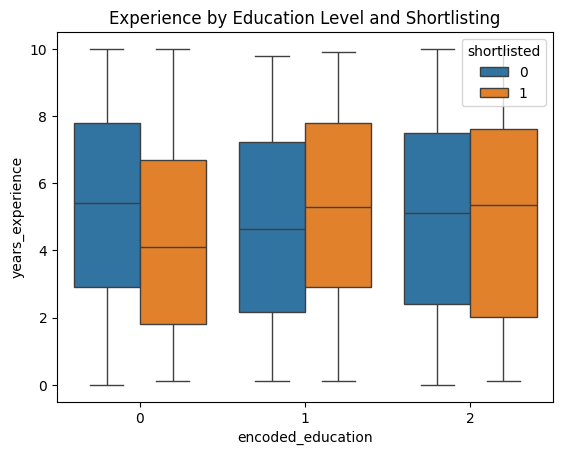

In [109]:
sns.boxplot(data=df1, x='encoded_education', y='years_experience', hue='shortlisted')
plt.title('Experience by Education Level and Shortlisting')
plt.show()

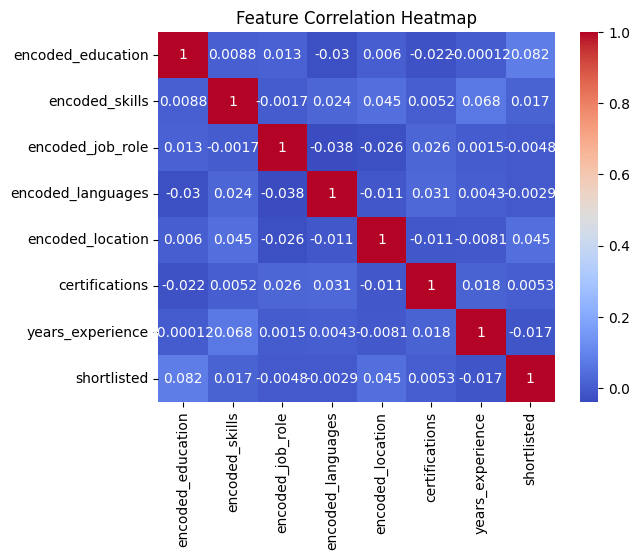

In [110]:
features = ['encoded_education', 'encoded_skills', 'encoded_job_role',
            'encoded_languages', 'encoded_location', 'certifications',
            'years_experience', 'shortlisted']
sns.heatmap(df1[features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()